In [1]:
import sys
sys.path.append("..")
from IPython.display import SVG
import keras
from keras.utils.vis_utils import model_to_dot
from models import autoencoderV3
from utils.data_preprocessing import encode_sequences, MinMaxScaler3D, shuffle_array
from utils.parsers import parse_bulkiness, parse_hydrophobicity, load_kabat, vdw_data, charge_index_data
from utils.defines import VL_LENGTH, VH_LENGTH 

/home/gil/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
VL_sequences, VH_sequences, names_mask, animals_mask = load_kabat('../data/kabat_animals.html')

h_data = parse_hydrophobicity('../data/consensus.hpb')
bulkiness_data = parse_bulkiness('../data/amino_acid_bulkiness.txt')

DATASETS = [h_data, bulkiness_data, vdw_data, charge_index_data]

ss_VH = MinMaxScaler3D(mask=0)
ss_VL = MinMaxScaler3D(mask=0)

VH_encoded = encode_sequences(VH_sequences, VH_LENGTH, DATASETS)
VL_encoded = encode_sequences(VL_sequences, VL_LENGTH, DATASETS)

VH_encoded = ss_VH.fit_transform(VH_encoded)
VL_encoded = ss_VL.fit_transform(VL_encoded)

VH_encoded_shuffled, VL_encoded_shuffled = shuffle_array(VH_encoded, VL_encoded)

In [3]:
encoder, autoencoder, sess = autoencoderV3(4)

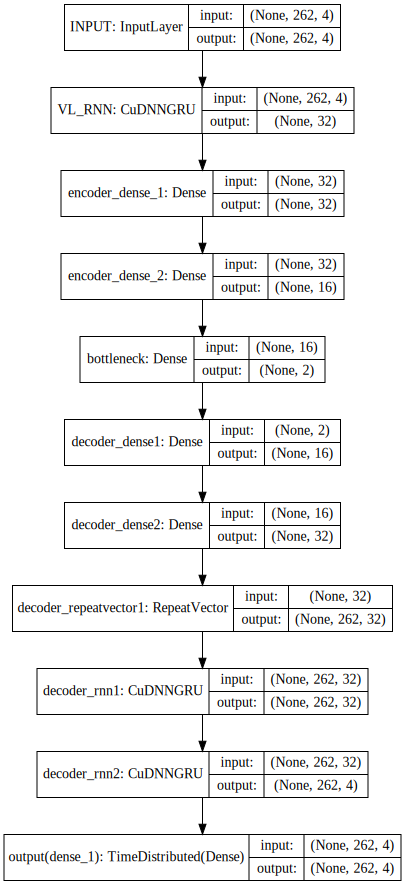

In [4]:
SVG(model_to_dot(autoencoder, show_shapes=True).create(prog='dot', format='svg'))

In [7]:
import numpy as np

In [12]:
concat = np.concatenate((VL_encoded_shuffled, VH_encoded_shuffled), axis=1)

In [13]:
history = autoencoder.fit(concat, concat, 
                          epochs=2000, batch_size=32, validation_split=0.2,
                          callbacks=[keras.callbacks.ModelCheckpoint('../model_weights/autoencoderV3/run1/autoencoderV3_allfeatures.hdf5',
                                                                     save_best_only=True),
                                     keras.callbacks.TensorBoard('../logs/autoencoderV3/run1')])

Train on 1706 samples, validate on 427 samples
Epoch 1/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.4257 - val_loss: 0.2615
Epoch 2/2000
1706/1706 [==============================] - 2s 895us/step - loss: 0.2608 - val_loss: 0.2595
Epoch 3/2000
1706/1706 [==============================] - 1s 866us/step - loss: 0.2591 - val_loss: 0.2584
Epoch 4/2000
1706/1706 [==============================] - 2s 888us/step - loss: 0.2583 - val_loss: 0.2577
Epoch 5/2000
1706/1706 [==============================] - 2s 890us/step - loss: 0.2577 - val_loss: 0.2572
Epoch 6/2000
1706/1706 [==============================] - 2s 937us/step - loss: 0.2572 - val_loss: 0.2569
Epoch 7/2000
1706/1706 [==============================] - 2s 908us/step - loss: 0.2569 - val_loss: 0.2566
Epoch 8/2000
1706/1706 [==============================] - 1s 874us/step - loss: 0.2567 - val_loss: 0.2564
Epoch 9/2000
1706/1706 [==============================] - 2s 884us/step - loss: 0.2565 - val_loss: 0.2562
E

1706/1706 [==============================] - 1s 819us/step - loss: 0.2525 - val_loss: 0.2520
Epoch 78/2000
1706/1706 [==============================] - 1s 821us/step - loss: 0.2525 - val_loss: 0.2519
Epoch 79/2000
1706/1706 [==============================] - 1s 822us/step - loss: 0.2523 - val_loss: 0.2517
Epoch 80/2000
1706/1706 [==============================] - 1s 860us/step - loss: 0.2522 - val_loss: 0.2517
Epoch 81/2000
1706/1706 [==============================] - 1s 840us/step - loss: 0.2522 - val_loss: 0.2516
Epoch 82/2000
1706/1706 [==============================] - 1s 805us/step - loss: 0.2522 - val_loss: 0.2515
Epoch 83/2000
1706/1706 [==============================] - 1s 812us/step - loss: 0.2521 - val_loss: 0.2514
Epoch 84/2000
1706/1706 [==============================] - 1s 849us/step - loss: 0.2519 - val_loss: 0.2513
Epoch 85/2000
1706/1706 [==============================] - 2s 899us/step - loss: 0.2518 - val_loss: 0.2512
Epoch 86/2000
1706/1706 [==========================

1706/1706 [==============================] - 1s 835us/step - loss: 0.2424 - val_loss: 0.2417
Epoch 154/2000
1706/1706 [==============================] - 1s 814us/step - loss: 0.2422 - val_loss: 0.2419
Epoch 155/2000
1706/1706 [==============================] - 1s 830us/step - loss: 0.2424 - val_loss: 0.2417
Epoch 156/2000
1706/1706 [==============================] - 1s 806us/step - loss: 0.2418 - val_loss: 0.2414
Epoch 157/2000
1706/1706 [==============================] - 1s 813us/step - loss: 0.2420 - val_loss: 0.2412
Epoch 158/2000
1706/1706 [==============================] - 1s 806us/step - loss: 0.2418 - val_loss: 0.2411
Epoch 159/2000
1706/1706 [==============================] - 1s 818us/step - loss: 0.2417 - val_loss: 0.2416
Epoch 160/2000
1706/1706 [==============================] - 1s 811us/step - loss: 0.2416 - val_loss: 0.2417
Epoch 161/2000
1706/1706 [==============================] - 1s 798us/step - loss: 0.2417 - val_loss: 0.2411
Epoch 162/2000
1706/1706 [=================

1706/1706 [==============================] - 2s 884us/step - loss: 0.2367 - val_loss: 0.2351
Epoch 230/2000
1706/1706 [==============================] - 1s 772us/step - loss: 0.2368 - val_loss: 0.2369
Epoch 231/2000
1706/1706 [==============================] - 1s 785us/step - loss: 0.2361 - val_loss: 0.2349
Epoch 232/2000
1706/1706 [==============================] - 1s 786us/step - loss: 0.2365 - val_loss: 0.2347
Epoch 233/2000
1706/1706 [==============================] - 1s 818us/step - loss: 0.2358 - val_loss: 0.2351
Epoch 234/2000
1706/1706 [==============================] - 1s 793us/step - loss: 0.2370 - val_loss: 0.2361
Epoch 235/2000
1706/1706 [==============================] - 1s 795us/step - loss: 0.2359 - val_loss: 0.2349
Epoch 236/2000
1706/1706 [==============================] - 1s 805us/step - loss: 0.2356 - val_loss: 0.2399
Epoch 237/2000
1706/1706 [==============================] - 1s 810us/step - loss: 0.2367 - val_loss: 0.2361
Epoch 238/2000
1706/1706 [=================

1706/1706 [==============================] - 1s 841us/step - loss: 0.2332 - val_loss: 0.2310
Epoch 306/2000
1706/1706 [==============================] - 1s 836us/step - loss: 0.2322 - val_loss: 0.2316
Epoch 307/2000
1706/1706 [==============================] - 1s 835us/step - loss: 0.2321 - val_loss: 0.2314
Epoch 308/2000
1706/1706 [==============================] - 1s 859us/step - loss: 0.2330 - val_loss: 0.2322
Epoch 309/2000
1706/1706 [==============================] - 1s 842us/step - loss: 0.2327 - val_loss: 0.2327
Epoch 310/2000
1706/1706 [==============================] - 1s 813us/step - loss: 0.2324 - val_loss: 0.2316
Epoch 311/2000
1706/1706 [==============================] - 1s 837us/step - loss: 0.2321 - val_loss: 0.2311
Epoch 312/2000
1706/1706 [==============================] - 1s 791us/step - loss: 0.2323 - val_loss: 0.2307
Epoch 313/2000
1706/1706 [==============================] - 1s 813us/step - loss: 0.2322 - val_loss: 0.2311
Epoch 314/2000
1706/1706 [=================

1706/1706 [==============================] - 1s 773us/step - loss: 0.2286 - val_loss: 0.2281
Epoch 382/2000
1706/1706 [==============================] - 2s 918us/step - loss: 0.2298 - val_loss: 0.2274
Epoch 383/2000
1706/1706 [==============================] - 4s 3ms/step - loss: 0.2285 - val_loss: 0.2272
Epoch 384/2000
1706/1706 [==============================] - 4s 2ms/step - loss: 0.2285 - val_loss: 0.2276
Epoch 385/2000
1706/1706 [==============================] - 4s 3ms/step - loss: 0.2289 - val_loss: 0.2275
Epoch 386/2000
1706/1706 [==============================] - 4s 3ms/step - loss: 0.2282 - val_loss: 0.2273
Epoch 387/2000
1706/1706 [==============================] - 4s 3ms/step - loss: 0.2285 - val_loss: 0.2281
Epoch 388/2000
1706/1706 [==============================] - 4s 3ms/step - loss: 0.2291 - val_loss: 0.2275
Epoch 389/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.2287 - val_loss: 0.2270
Epoch 390/2000
1706/1706 [==============================]

1706/1706 [==============================] - 2s 976us/step - loss: 0.2255 - val_loss: 0.2251
Epoch 458/2000
1706/1706 [==============================] - 1s 846us/step - loss: 0.2255 - val_loss: 0.2262
Epoch 459/2000
1706/1706 [==============================] - 1s 846us/step - loss: 0.2251 - val_loss: 0.2245
Epoch 460/2000
1706/1706 [==============================] - 1s 850us/step - loss: 0.2257 - val_loss: 0.2247
Epoch 461/2000
1706/1706 [==============================] - 1s 854us/step - loss: 0.2268 - val_loss: 0.2267
Epoch 462/2000
1706/1706 [==============================] - 1s 856us/step - loss: 0.2260 - val_loss: 0.2249
Epoch 463/2000
1706/1706 [==============================] - 1s 845us/step - loss: 0.2258 - val_loss: 0.2253
Epoch 464/2000
1706/1706 [==============================] - 1s 849us/step - loss: 0.2253 - val_loss: 0.2247
Epoch 465/2000
1706/1706 [==============================] - 1s 839us/step - loss: 0.2251 - val_loss: 0.2244
Epoch 466/2000
1706/1706 [=================

1706/1706 [==============================] - 1s 841us/step - loss: 0.2223 - val_loss: 0.2213
Epoch 534/2000
1706/1706 [==============================] - 1s 811us/step - loss: 0.2225 - val_loss: 0.2228
Epoch 535/2000
1706/1706 [==============================] - 1s 840us/step - loss: 0.2225 - val_loss: 0.2233
Epoch 536/2000
1706/1706 [==============================] - 1s 851us/step - loss: 0.2232 - val_loss: 0.2236
Epoch 537/2000
1706/1706 [==============================] - 1s 823us/step - loss: 0.2226 - val_loss: 0.2224
Epoch 538/2000
1706/1706 [==============================] - 1s 828us/step - loss: 0.2222 - val_loss: 0.2212
Epoch 539/2000
1706/1706 [==============================] - 1s 821us/step - loss: 0.2219 - val_loss: 0.2212
Epoch 540/2000
1706/1706 [==============================] - 1s 829us/step - loss: 0.2232 - val_loss: 0.2220
Epoch 541/2000
1706/1706 [==============================] - 1s 814us/step - loss: 0.2230 - val_loss: 0.2226
Epoch 542/2000
1706/1706 [=================

1706/1706 [==============================] - ETA: 0s - loss: 0.219 - 1s 849us/step - loss: 0.2197 - val_loss: 0.2190
Epoch 610/2000
1706/1706 [==============================] - 1s 870us/step - loss: 0.2192 - val_loss: 0.2200
Epoch 611/2000
1706/1706 [==============================] - 1s 855us/step - loss: 0.2190 - val_loss: 0.2190
Epoch 612/2000
1706/1706 [==============================] - 1s 860us/step - loss: 0.2196 - val_loss: 0.2197
Epoch 613/2000
1706/1706 [==============================] - 1s 869us/step - loss: 0.2192 - val_loss: 0.2186
Epoch 614/2000
1706/1706 [==============================] - 1s 863us/step - loss: 0.2190 - val_loss: 0.2184
Epoch 615/2000
1706/1706 [==============================] - 1s 856us/step - loss: 0.2205 - val_loss: 0.2196
Epoch 616/2000
1706/1706 [==============================] - 1s 850us/step - loss: 0.2197 - val_loss: 0.2190
Epoch 617/2000
1706/1706 [==============================] - 1s 851us/step - loss: 0.2191 - val_loss: 0.2185
Epoch 618/2000
1706

Epoch 685/2000
1706/1706 [==============================] - 1s 867us/step - loss: 0.2173 - val_loss: 0.2173
Epoch 686/2000
1706/1706 [==============================] - 1s 874us/step - loss: 0.2180 - val_loss: 0.2165
Epoch 687/2000
1706/1706 [==============================] - 2s 883us/step - loss: 0.2193 - val_loss: 0.2179
Epoch 688/2000
1706/1706 [==============================] - 1s 841us/step - loss: 0.2173 - val_loss: 0.2178
Epoch 689/2000
1706/1706 [==============================] - 1s 866us/step - loss: 0.2171 - val_loss: 0.2167
Epoch 690/2000
1706/1706 [==============================] - 2s 882us/step - loss: 0.2173 - val_loss: 0.2166
Epoch 691/2000
1706/1706 [==============================] - 1s 856us/step - loss: 0.2170 - val_loss: 0.2163
Epoch 692/2000
1706/1706 [==============================] - 1s 840us/step - loss: 0.2168 - val_loss: 0.2203
Epoch 693/2000
1706/1706 [==============================] - 1s 870us/step - loss: 0.2178 - val_loss: 0.2175
Epoch 694/2000
1706/1706 [==

1706/1706 [==============================] - 1s 851us/step - loss: 0.2158 - val_loss: 0.2158
Epoch 761/2000
1706/1706 [==============================] - 1s 863us/step - loss: 0.2155 - val_loss: 0.2160
Epoch 762/2000
1706/1706 [==============================] - 1s 852us/step - loss: 0.2156 - val_loss: 0.2156
Epoch 763/2000
1706/1706 [==============================] - 1s 855us/step - loss: 0.2164 - val_loss: 0.2170
Epoch 764/2000
1706/1706 [==============================] - 1s 853us/step - loss: 0.2162 - val_loss: 0.2164
Epoch 765/2000
1706/1706 [==============================] - 1s 862us/step - loss: 0.2160 - val_loss: 0.2162
Epoch 766/2000
1706/1706 [==============================] - 1s 843us/step - loss: 0.2212 - val_loss: 0.2156
Epoch 767/2000
1706/1706 [==============================] - 1s 845us/step - loss: 0.2152 - val_loss: 0.2155
Epoch 768/2000
1706/1706 [==============================] - 1s 845us/step - loss: 0.2152 - val_loss: 0.2152
Epoch 769/2000
1706/1706 [=================

1706/1706 [==============================] - 2s 1ms/step - loss: 0.2146 - val_loss: 0.2149
Epoch 837/2000
1706/1706 [==============================] - 1s 815us/step - loss: 0.2147 - val_loss: 0.2142
Epoch 838/2000
1706/1706 [==============================] - 1s 821us/step - loss: 0.2146 - val_loss: 0.2158
Epoch 839/2000
1706/1706 [==============================] - 1s 823us/step - loss: 0.2152 - val_loss: 0.2233
Epoch 840/2000
1706/1706 [==============================] - 1s 828us/step - loss: 0.2164 - val_loss: 0.2156
Epoch 841/2000
1706/1706 [==============================] - 1s 840us/step - loss: 0.2150 - val_loss: 0.2147
Epoch 842/2000
1706/1706 [==============================] - 1s 816us/step - loss: 0.2147 - val_loss: 0.2141
Epoch 843/2000
1706/1706 [==============================] - 1s 825us/step - loss: 0.2144 - val_loss: 0.2149
Epoch 844/2000
1706/1706 [==============================] - 1s 819us/step - loss: 0.2153 - val_loss: 0.2184
Epoch 845/2000
1706/1706 [===================

1706/1706 [==============================] - 1s 807us/step - loss: 0.2131 - val_loss: 0.2132
Epoch 913/2000
1706/1706 [==============================] - 1s 817us/step - loss: 0.2135 - val_loss: 0.2140
Epoch 914/2000
1706/1706 [==============================] - 1s 811us/step - loss: 0.2138 - val_loss: 0.2150
Epoch 915/2000
1706/1706 [==============================] - 1s 862us/step - loss: 0.2132 - val_loss: 0.2133
Epoch 916/2000
1706/1706 [==============================] - 2s 943us/step - loss: 0.2131 - val_loss: 0.2127
Epoch 917/2000
1706/1706 [==============================] - 1s 827us/step - loss: 0.2134 - val_loss: 0.2152
Epoch 918/2000
1706/1706 [==============================] - 2s 904us/step - loss: 0.2136 - val_loss: 0.2150
Epoch 919/2000
1706/1706 [==============================] - 2s 899us/step - loss: 0.2137 - val_loss: 0.2130
Epoch 920/2000
1706/1706 [==============================] - 2s 928us/step - loss: 0.2134 - val_loss: 0.2185
Epoch 921/2000
1706/1706 [=================

1706/1706 [==============================] - 1s 821us/step - loss: 0.2123 - val_loss: 0.2126
Epoch 989/2000
1706/1706 [==============================] - 1s 824us/step - loss: 0.2119 - val_loss: 0.2131
Epoch 990/2000
1706/1706 [==============================] - 1s 825us/step - loss: 0.2124 - val_loss: 0.2120
Epoch 991/2000
1706/1706 [==============================] - 1s 821us/step - loss: 0.2117 - val_loss: 0.2119
Epoch 992/2000
1706/1706 [==============================] - 1s 824us/step - loss: 0.2116 - val_loss: 0.2121
Epoch 993/2000
1706/1706 [==============================] - 1s 819us/step - loss: 0.2121 - val_loss: 0.2132
Epoch 994/2000
1706/1706 [==============================] - 1s 815us/step - loss: 0.2122 - val_loss: 0.2137
Epoch 995/2000
1706/1706 [==============================] - 1s 832us/step - loss: 0.2120 - val_loss: 0.2121
Epoch 996/2000
1706/1706 [==============================] - 1s 837us/step - loss: 0.2120 - val_loss: 0.2123
Epoch 997/2000
1706/1706 [=================

1706/1706 [==============================] - 2s 882us/step - loss: 0.2110 - val_loss: 0.2115
Epoch 1064/2000
1706/1706 [==============================] - 1s 875us/step - loss: 0.2112 - val_loss: 0.2106
Epoch 1065/2000
1706/1706 [==============================] - 2s 943us/step - loss: 0.2108 - val_loss: 0.2134
Epoch 1066/2000
1706/1706 [==============================] - 2s 948us/step - loss: 0.2124 - val_loss: 0.2113
Epoch 1067/2000
1706/1706 [==============================] - 2s 924us/step - loss: 0.2105 - val_loss: 0.2107
Epoch 1068/2000
1706/1706 [==============================] - 1s 818us/step - loss: 0.2103 - val_loss: 0.2135
Epoch 1069/2000
1706/1706 [==============================] - 2s 949us/step - loss: 0.2108 - val_loss: 0.2110
Epoch 1070/2000
1706/1706 [==============================] - 1s 817us/step - loss: 0.2102 - val_loss: 0.2180
Epoch 1071/2000
1706/1706 [==============================] - 1s 828us/step - loss: 0.2110 - val_loss: 0.2113
Epoch 1072/2000
1706/1706 [========

1706/1706 [==============================] - 1s 830us/step - loss: 0.2114 - val_loss: 0.2120
Epoch 1139/2000
1706/1706 [==============================] - 1s 817us/step - loss: 0.2098 - val_loss: 0.2125
Epoch 1140/2000
1706/1706 [==============================] - 1s 831us/step - loss: 0.2101 - val_loss: 0.2102
Epoch 1141/2000
1706/1706 [==============================] - 1s 828us/step - loss: 0.2116 - val_loss: 0.2109
Epoch 1142/2000
1706/1706 [==============================] - 1s 824us/step - loss: 0.2098 - val_loss: 0.2099
Epoch 1143/2000
1706/1706 [==============================] - 1s 831us/step - loss: 0.2096 - val_loss: 0.2099
Epoch 1144/2000
1706/1706 [==============================] - 1s 813us/step - loss: 0.2092 - val_loss: 0.2122
Epoch 1145/2000
1706/1706 [==============================] - 1s 821us/step - loss: 0.2111 - val_loss: 0.2097
Epoch 1146/2000
1706/1706 [==============================] - 1s 830us/step - loss: 0.2094 - val_loss: 0.2098
Epoch 1147/2000
1706/1706 [========

1706/1706 [==============================] - 2s 1ms/step - loss: 0.2085 - val_loss: 0.2114
Epoch 1214/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.2101 - val_loss: 0.2117
Epoch 1215/2000
1706/1706 [==============================] - 1s 824us/step - loss: 0.2086 - val_loss: 0.2089
Epoch 1216/2000
1706/1706 [==============================] - 1s 837us/step - loss: 0.2081 - val_loss: 0.2086
Epoch 1217/2000
1706/1706 [==============================] - 1s 824us/step - loss: 0.2079 - val_loss: 0.2116
Epoch 1218/2000
1706/1706 [==============================] - 1s 820us/step - loss: 0.2085 - val_loss: 0.2094
Epoch 1219/2000
1706/1706 [==============================] - 1s 809us/step - loss: 0.2093 - val_loss: 0.2097
Epoch 1220/2000
1706/1706 [==============================] - 1s 832us/step - loss: 0.2087 - val_loss: 0.2086
Epoch 1221/2000
1706/1706 [==============================] - 1s 824us/step - loss: 0.2082 - val_loss: 0.2098
Epoch 1222/2000
1706/1706 [============

1706/1706 [==============================] - 1s 829us/step - loss: 0.2081 - val_loss: 0.2096
Epoch 1289/2000
1706/1706 [==============================] - 2s 931us/step - loss: 0.2102 - val_loss: 0.2093
Epoch 1290/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.2085 - val_loss: 0.2079
Epoch 1291/2000
1706/1706 [==============================] - 2s 897us/step - loss: 0.2080 - val_loss: 0.2076
Epoch 1292/2000
1706/1706 [==============================] - 2s 934us/step - loss: 0.2083 - val_loss: 0.2089
Epoch 1293/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.2074 - val_loss: 0.2104
Epoch 1294/2000
1706/1706 [==============================] - 1s 826us/step - loss: 0.2073 - val_loss: 0.2076
Epoch 1295/2000
1706/1706 [==============================] - 1s 828us/step - loss: 0.2080 - val_loss: 0.2130
Epoch 1296/2000
1706/1706 [==============================] - 1s 823us/step - loss: 0.2077 - val_loss: 0.2091
Epoch 1297/2000
1706/1706 [============

1706/1706 [==============================] - 2s 1ms/step - loss: 0.2069 - val_loss: 0.2073
Epoch 1364/2000
1706/1706 [==============================] - 2s 940us/step - loss: 0.2074 - val_loss: 0.2086
Epoch 1365/2000
1706/1706 [==============================] - 1s 864us/step - loss: 0.2068 - val_loss: 0.2084
Epoch 1366/2000
1706/1706 [==============================] - 2s 899us/step - loss: 0.2068 - val_loss: 0.2097
Epoch 1367/2000
1706/1706 [==============================] - 2s 904us/step - loss: 0.2064 - val_loss: 0.2077
Epoch 1368/2000
1706/1706 [==============================] - 2s 923us/step - loss: 0.2067 - val_loss: 0.2083
Epoch 1369/2000
1706/1706 [==============================] - 2s 933us/step - loss: 0.2070 - val_loss: 0.2132
Epoch 1370/2000
1706/1706 [==============================] - 2s 963us/step - loss: 0.2078 - val_loss: 0.2100
Epoch 1371/2000
1706/1706 [==============================] - 2s 928us/step - loss: 0.2074 - val_loss: 0.2147
Epoch 1372/2000
1706/1706 [==========

1706/1706 [==============================] - 1s 817us/step - loss: 0.2065 - val_loss: 0.2071
Epoch 1439/2000
1706/1706 [==============================] - 1s 854us/step - loss: 0.2074 - val_loss: 0.2085
Epoch 1440/2000
1706/1706 [==============================] - 1s 827us/step - loss: 0.2063 - val_loss: 0.2080
Epoch 1441/2000
1706/1706 [==============================] - 2s 883us/step - loss: 0.2076 - val_loss: 0.2102
Epoch 1442/2000
1706/1706 [==============================] - 2s 991us/step - loss: 0.2064 - val_loss: 0.2074
Epoch 1443/2000
1706/1706 [==============================] - 2s 937us/step - loss: 0.2063 - val_loss: 0.2071
Epoch 1444/2000
1706/1706 [==============================] - 2s 939us/step - loss: 0.2062 - val_loss: 0.2079
Epoch 1445/2000
1706/1706 [==============================] - 2s 930us/step - loss: 0.2063 - val_loss: 0.2074
Epoch 1446/2000
1706/1706 [==============================] - 1s 838us/step - loss: 0.2060 - val_loss: 0.2085
Epoch 1447/2000
1706/1706 [========

1706/1706 [==============================] - 1s 853us/step - loss: 0.2052 - val_loss: 0.2070
Epoch 1514/2000
1706/1706 [==============================] - 1s 835us/step - loss: 0.2099 - val_loss: 0.2077
Epoch 1515/2000
1706/1706 [==============================] - 1s 851us/step - loss: 0.2057 - val_loss: 0.2108
Epoch 1516/2000
1706/1706 [==============================] - 1s 826us/step - loss: 0.2058 - val_loss: 0.2066
Epoch 1517/2000
1706/1706 [==============================] - 1s 844us/step - loss: 0.2056 - val_loss: 0.2084
Epoch 1518/2000
1706/1706 [==============================] - 1s 834us/step - loss: 0.2050 - val_loss: 0.2068
Epoch 1519/2000
1706/1706 [==============================] - 1s 847us/step - loss: 0.2053 - val_loss: 0.2061
Epoch 1520/2000
1706/1706 [==============================] - 1s 821us/step - loss: 0.2068 - val_loss: 0.2062
Epoch 1521/2000
1706/1706 [==============================] - 1s 839us/step - loss: 0.2061 - val_loss: 0.2058
Epoch 1522/2000
1706/1706 [========

1706/1706 [==============================] - 1s 823us/step - loss: 0.2082 - val_loss: 0.2091
Epoch 1589/2000
1706/1706 [==============================] - 1s 805us/step - loss: 0.2094 - val_loss: 0.2077
Epoch 1590/2000
1706/1706 [==============================] - 1s 816us/step - loss: 0.2069 - val_loss: 0.2074
Epoch 1591/2000
1706/1706 [==============================] - 1s 838us/step - loss: 0.2067 - val_loss: 0.2075
Epoch 1592/2000
1706/1706 [==============================] - 1s 808us/step - loss: 0.2064 - val_loss: 0.2074
Epoch 1593/2000
1706/1706 [==============================] - 1s 799us/step - loss: 0.2060 - val_loss: 0.2061
Epoch 1594/2000
1706/1706 [==============================] - 1s 813us/step - loss: 0.2055 - val_loss: 0.2060
Epoch 1595/2000
1706/1706 [==============================] - 1s 799us/step - loss: 0.2063 - val_loss: 0.2061
Epoch 1596/2000
1706/1706 [==============================] - 1s 806us/step - loss: 0.2076 - val_loss: 0.2064
Epoch 1597/2000
1706/1706 [========

1706/1706 [==============================] - 2s 960us/step - loss: 0.2053 - val_loss: 0.2094
Epoch 1664/2000
1706/1706 [==============================] - 1s 870us/step - loss: 0.2058 - val_loss: 0.2067
Epoch 1665/2000
1706/1706 [==============================] - 1s 817us/step - loss: 0.2062 - val_loss: 0.2095
Epoch 1666/2000
1706/1706 [==============================] - 1s 858us/step - loss: 0.2054 - val_loss: 0.2064
Epoch 1667/2000
1706/1706 [==============================] - 1s 817us/step - loss: 0.2066 - val_loss: 0.2136
Epoch 1668/2000
1706/1706 [==============================] - 2s 881us/step - loss: 0.2095 - val_loss: 0.2064
Epoch 1669/2000
1706/1706 [==============================] - 2s 956us/step - loss: 0.2042 - val_loss: 0.2054
Epoch 1670/2000
1706/1706 [==============================] - 2s 970us/step - loss: 0.2039 - val_loss: 0.2063
Epoch 1671/2000
1706/1706 [==============================] - 2s 890us/step - loss: 0.2039 - val_loss: 0.2058
Epoch 1672/2000
1706/1706 [========

1706/1706 [==============================] - 2s 898us/step - loss: 0.2063 - val_loss: 0.2061
Epoch 1739/2000
1706/1706 [==============================] - 1s 800us/step - loss: 0.2039 - val_loss: 0.2052
Epoch 1740/2000
1706/1706 [==============================] - 1s 865us/step - loss: 0.2049 - val_loss: 0.2054
Epoch 1741/2000
1706/1706 [==============================] - 2s 913us/step - loss: 0.2039 - val_loss: 0.2095
Epoch 1742/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.2045 - val_loss: 0.2057
Epoch 1743/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.2040 - val_loss: 0.2107
Epoch 1744/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.2051 - val_loss: 0.2081
Epoch 1745/2000
1706/1706 [==============================] - 2s 949us/step - loss: 0.2039 - val_loss: 0.2054
Epoch 1746/2000
1706/1706 [==============================] - 2s 914us/step - loss: 0.2043 - val_loss: 0.2062
Epoch 1747/2000
1706/1706 [==============

1706/1706 [==============================] - 1s 833us/step - loss: 0.2028 - val_loss: 0.2149
Epoch 1814/2000
1706/1706 [==============================] - 1s 859us/step - loss: 0.2044 - val_loss: 0.2047
Epoch 1815/2000
1706/1706 [==============================] - 1s 864us/step - loss: 0.2029 - val_loss: 0.2053
Epoch 1816/2000
1706/1706 [==============================] - 1s 854us/step - loss: 0.2034 - val_loss: 0.2048
Epoch 1817/2000
1706/1706 [==============================] - 1s 843us/step - loss: 0.2025 - val_loss: 0.2042
Epoch 1818/2000
1706/1706 [==============================] - 1s 871us/step - loss: 0.2029 - val_loss: 0.2041
Epoch 1819/2000
1706/1706 [==============================] - 1s 856us/step - loss: 0.2025 - val_loss: 0.2041
Epoch 1820/2000
1706/1706 [==============================] - 1s 847us/step - loss: 0.2032 - val_loss: 0.2050
Epoch 1821/2000
1706/1706 [==============================] - 1s 845us/step - loss: 0.2048 - val_loss: 0.2072
Epoch 1822/2000
1706/1706 [========

1706/1706 [==============================] - 1s 857us/step - loss: 0.2038 - val_loss: 0.2127
Epoch 1889/2000
1706/1706 [==============================] - 1s 853us/step - loss: 0.2038 - val_loss: 0.2059
Epoch 1890/2000
1706/1706 [==============================] - 1s 859us/step - loss: 0.2023 - val_loss: 0.2038
Epoch 1891/2000
1706/1706 [==============================] - 1s 835us/step - loss: 0.2022 - val_loss: 0.2038
Epoch 1892/2000
1706/1706 [==============================] - 1s 839us/step - loss: 0.2021 - val_loss: 0.2040
Epoch 1893/2000
1706/1706 [==============================] - 1s 838us/step - loss: 0.2029 - val_loss: 0.2062
Epoch 1894/2000
1706/1706 [==============================] - 1s 848us/step - loss: 0.2030 - val_loss: 0.2041
Epoch 1895/2000
1706/1706 [==============================] - 1s 859us/step - loss: 0.2019 - val_loss: 0.2036
Epoch 1896/2000
1706/1706 [==============================] - 1s 874us/step - loss: 0.2020 - val_loss: 0.2048
Epoch 1897/2000
1706/1706 [========

1706/1706 [==============================] - 1s 817us/step - loss: 0.2021 - val_loss: 0.2028
Epoch 1964/2000
1706/1706 [==============================] - 1s 799us/step - loss: 0.2015 - val_loss: 0.2038
Epoch 1965/2000
1706/1706 [==============================] - 1s 802us/step - loss: 0.2030 - val_loss: 0.2035
Epoch 1966/2000
1706/1706 [==============================] - 1s 821us/step - loss: 0.2013 - val_loss: 0.2033
Epoch 1967/2000
1706/1706 [==============================] - 1s 823us/step - loss: 0.2021 - val_loss: 0.2054
Epoch 1968/2000
1706/1706 [==============================] - 1s 817us/step - loss: 0.2024 - val_loss: 0.2030
Epoch 1969/2000
1706/1706 [==============================] - 1s 833us/step - loss: 0.2021 - val_loss: 0.2032
Epoch 1970/2000
1706/1706 [==============================] - 1s 800us/step - loss: 0.2015 - val_loss: 0.2037
Epoch 1971/2000
1706/1706 [==============================] - 1s 817us/step - loss: 0.2019 - val_loss: 0.2032
Epoch 1972/2000
1706/1706 [========

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

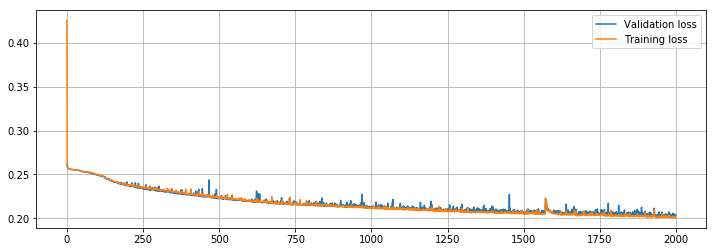

In [19]:
plt.figure(figsize=(12,4))
plt.plot(autoencoder.history.history['val_loss'], label='Validation loss')
plt.plot(autoencoder.history.history['loss'], label='Training loss')
plt.legend()
plt.grid()

In [20]:
autoencoder.load_weights('../model_weights/autoencoderV3/run1/autoencoderV3_allfeatures.hdf5')

In [21]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [22]:
code = encoder.predict(concat)

le = LabelEncoder().fit(animals_mask)
labels = le.transform(animals_mask)

unique_labels = np.unique(labels)

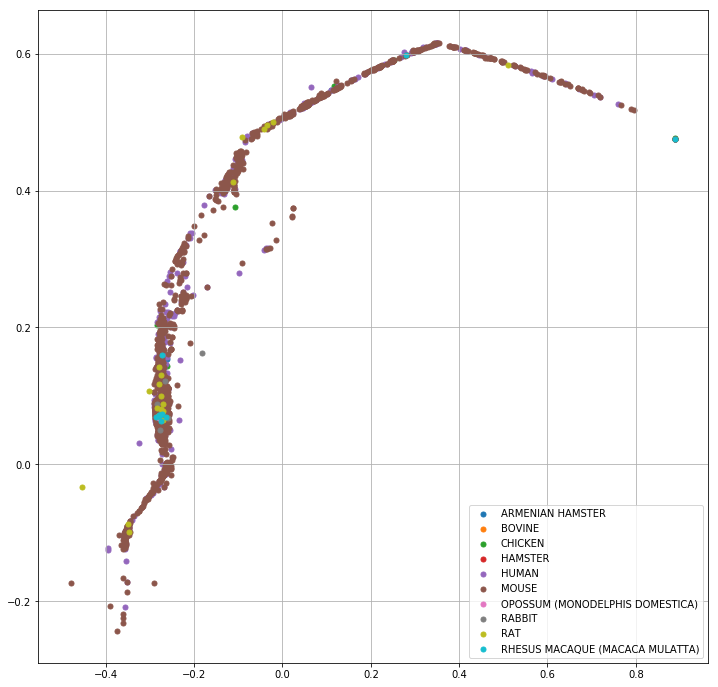

In [23]:
plt.figure(figsize=(12,12))
for x in range(unique_labels.size):
    mask_labels = labels == unique_labels[x]
    plt.scatter(code[mask_labels,0], code[mask_labels,1], marker='.', label=le.classes_[x], s=100)
plt.legend()
plt.grid()

In [24]:
from abpytools import FabCollection, ChainCollection
import pandas as pd

combinations = pd.read_csv('/home/gil/PhD/UCB/precollection/random_pairs.txt', index_col=0, delimiter=', ')

heavy_chains = ChainCollection(path='/home/gil/PhD/UCB/CombinationData/AbFiles/heavy_chains.json')
heavy_chains.load()
light_chains = ChainCollection(path='/home/gil/PhD/UCB/CombinationData/AbFiles/light_chains.json')
light_chains.load()

heavy_chains_list=[]
light_chains_list=[]

for heavy, light in  combinations['Random Pairs'].str.split('-'):
    heavy_chains_list.append(heavy_chains.get_object(heavy))
    light_chains_list.append(light_chains.get_object(light))    
    
fab_collection = FabCollection(None, heavy_chains_list, light_chains_list,
                               names=['P' + str(x) for x in combinations.index.tolist()])

Loading in antibody objects


/home/gil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.



Failed to load 0 objects in list
Loading in antibody objects



Failed to load 0 objects in list


In [26]:
data = pd.read_csv('/home/gil/PhD/UCB/Data/Tm/Processed Data/AllTmData.csv', index_col=0)
data.index = ['P' + str(x) for x in data.index]

VL_data = [''.join(x).replace('-','') for x in fab_collection.numbering_table()['Light'].values]
VH_data = [''.join(x).replace('-','') for x in fab_collection.numbering_table()['Heavy'].values]

VH_data_encoded = encode_sequences(VH_data, VH_LENGTH, DATASETS)
VL_data_encoded = encode_sequences(VL_data, VL_LENGTH, DATASETS)

VH_data_encoded = ss_VH.transform(VH_data_encoded)
VL_data_encoded = ss_VL.transform(VL_data_encoded)

code_1 = encoder.predict(np.concatenate((VL_data_encoded, VH_data_encoded), axis=1))

latent_data = pd.DataFrame(code_1, columns=['Latent1', 'Latent2'], index=fab_collection.names)

data = pd.read_csv('/home/gil/PhD/UCB/Data/Tm/Processed Data/AllTmData.csv', index_col=0)
data.index = ['P' + str(x) for x in data.index]

data.dropna(axis=0, inplace=True, subset=[data.columns[0]])

data = data.join(latent_data)

data.head()

,Tm D - Mean,Tm D - Std. Error,Tm2 - Mean,Tm2 - Std. Error,Latent1,Latent2
P2,64.473820,0.000000,NaN,NaN,-0.270612,0.060302
P3,73.982970,0.130358,NaN,NaN,-0.269760,0.093492
P4,64.326010,0.060344,NaN,NaN,-0.239572,0.207179
P6,74.192370,0.036953,NaN,NaN,-0.294125,-0.039232
P9,72.899025,0.085337,NaN,NaN,-0.241618,0.204014


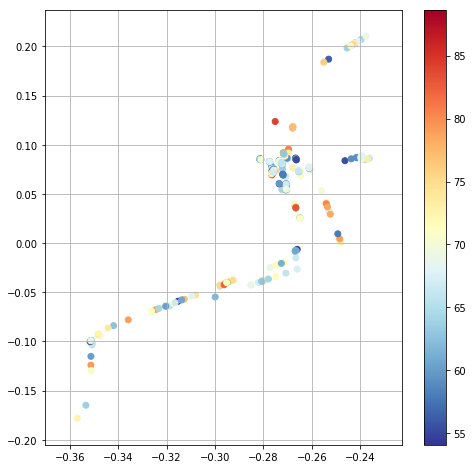

In [27]:
plt.figure(figsize=(8,8))
plt.scatter(data['Latent1'], data['Latent2'], c=data['Tm D - Mean'].values, cmap='RdYlBu_r')
plt.colorbar()
plt.grid()

In [28]:
from sklearn.cluster import KMeans

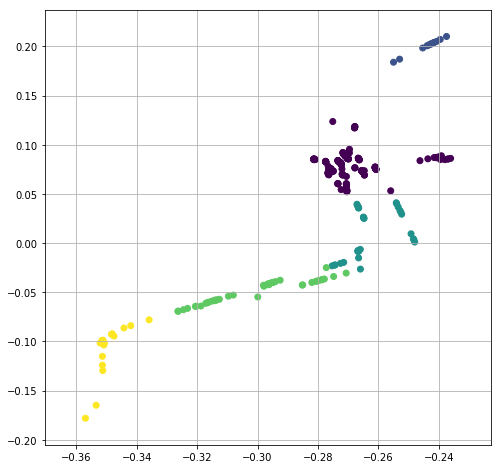

In [43]:
N_CLUSTERS = 5

kmeans = KMeans(N_CLUSTERS, init='random', random_state=45)
kmeans.fit(data[['Latent1','Latent2']])
plt.figure(figsize=(8,8))
plt.scatter(data['Latent1'], data['Latent2'], c=kmeans.labels_)
plt.grid()

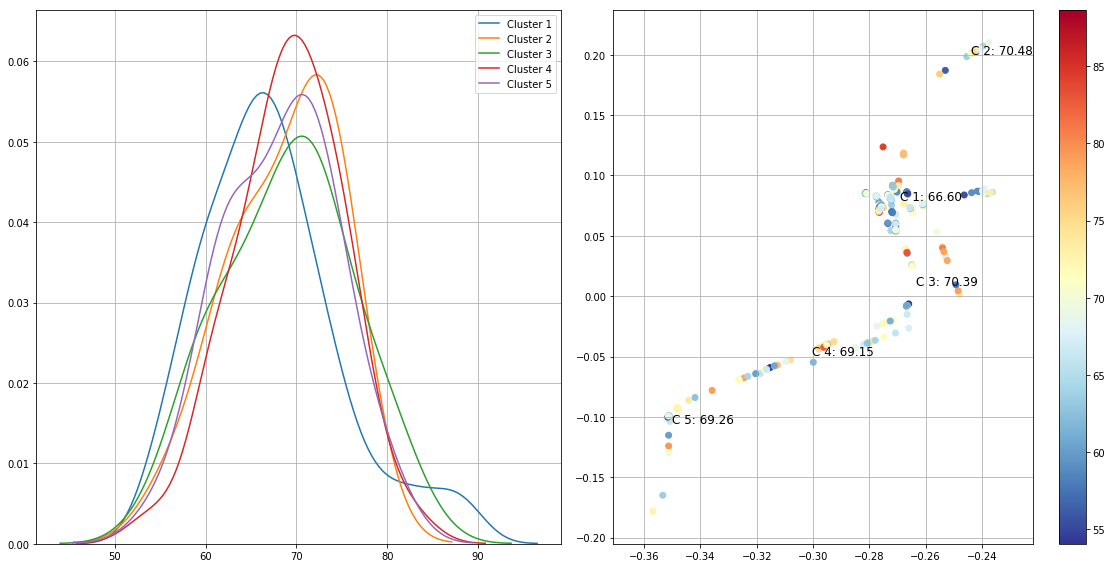

In [44]:
f, ax = plt.subplots(1,2,figsize=(16,8))
kmeans_labels = kmeans.predict(data[['Latent1','Latent2']]) 
tms = ax[1].scatter(data['Latent1'], data['Latent2'], c=data['Tm D - Mean'].values, cmap='RdYlBu_r')
for x in range(N_CLUSTERS):
    ax[1].text(kmeans.cluster_centers_[x][0], kmeans.cluster_centers_[x][1],
               'C {}: {:.2f}'.format(x+1, np.median(data.values[kmeans_labels==x, 0])), fontsize=12)
cbar = f.colorbar(tms)
ax[1].grid()
for x in range(N_CLUSTERS):
    sns.distplot(data.values[kmeans_labels==x, 0], ax=ax[0], hist=False, label='Cluster {}'.format(x+1))
ax[0].legend()
ax[0].grid()
#     print(data.values[kmeans_labels==x, 0].mean(), data.values[kmeans_labels==x, 0].std())
plt.tight_layout()